In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
plt.style.use('seaborn')

from sklearn.datasets import load_boston

Populating the interactive namespace from numpy and matplotlib


### Load our dataset

In [3]:
boston = load_boston()

In [4]:
all_data = pd.concat([pd.DataFrame(boston.data), pd.DataFrame(boston.target, columns=['13'])], axis=1)
print(all_data.shape)
all_data.head()

(506, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
all_names = np.concatenate([boston.feature_names, np.array(['MEDV'])])
all_names
all_data.columns = all_names.tolist()

In [5]:
data = all_data.copy()

In [6]:
X = data.drop(['MEDV'], axis=1)
y = data['MEDV']

In [7]:
# Train-Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

___
# Linear Models

## Linear Regression (Ordinary Least-Squares)

In [8]:
# Load the library
from sklearn.linear_model import LinearRegression

In [9]:
# Create an instance of the model
LR = LinearRegression()

In [10]:
# Fit the regressor
LR.fit(X_train, y_train)

LinearRegression()

In [11]:
# Do_predictions
predictions = LR.predict(X_test)
predictions[:5]

array([16.20056719, 39.35303128, 20.93888954, 32.0530595 , 32.96408659])

In [12]:
y_test[:5]

397     8.5
268    43.5
71     21.7
369    50.0
220    26.7
Name: MEDV, dtype: float64

In [13]:
# Parámetros de la ecuación --> B_1, B_2, ... , B_13
LR.coef_

array([-1.10950041e-01,  5.14792516e-02,  1.46710164e-02,  2.54024139e+00,
       -1.73088839e+01,  3.74439136e+00,  1.02978814e-02, -1.43041516e+00,
        3.00818242e-01, -1.22003631e-02, -1.04512753e+00,  9.93362956e-03,
       -5.13562301e-01])

In [14]:
# término independiente B_0
LR.intercept_

36.92288319640895

El método *.score()* devuelve la **métrica $R^2$**. *Cuánto más se acerca a **1** mejor será la predicción de nuestro modelo.*

In [15]:
# Precision del algoritmo
LR.score(X_test, y_test)

0.6398100240737812

> ### How sensitive are predictions to train-test split.

In [16]:
def split_sensitivity():
    """
    It plots all scores from both test and train datasets, given different train sizes.
    It's just pure curiosity.
    It takes no arguments.
    """
    
    proportions = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    test_scores = []
    train_scores = []
    
    for train_size in proportions:
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_size)
        LR = LinearRegression()
        LR.fit(X_train, y_train)
        test_score = LR.score(X_test, y_test)
        train_score = LR.score(X_train, y_train)
        test_scores.append(test_score)
        train_scores.append(train_score)
    
    plt.plot(proportions, test_scores, label='Test scores')
    plt.plot(proportions, train_scores, label='Train scores', c='r')
    plt.xlabel('Train sizes')
    plt.ylabel('Scores (R^2)')
    plt.title('Train-test split ')

    plt.legend()

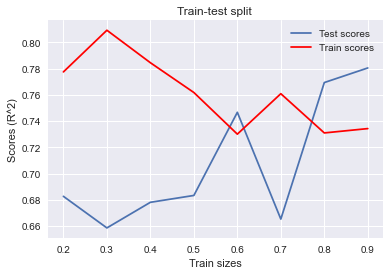

In [17]:
split_sensitivity()

## Ridge Regression

Ridge regression uses the same formula as Ordinary Least-Squares just adding an *alpha* parameter. This parameter is going to restrict the value of the coefficients and it will result in a lower slope.<br>
The *alpha* parameter penalty is called **Regularization** and it prevents overfitting and reduces the model complexity. <br>
Higher $\alpha$ means more Regularization and simpler model. <br>
The closer *alpha* is to 0, the closer Ridge Regression is to Linear Regression.

In [18]:
# Load the library
from sklearn.linear_model import Ridge

In [19]:
# Create an instance of the model and fit the regressor
ridge = Ridge().fit(X_train, y_train)

Scores given different *alphas*

In [20]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print('Ridge Regression. Alpha = 1')
print(f'\tTest score: {round(ridge.score(X_test, y_test), 2)}')
print(f'\tTrain score: {round(ridge.score(X_train, y_train), 2)}')

print('Ridge Regression. Alpha = 0.1')
print(f'\tTest score: {round(ridge01.score(X_test, y_test), 2)}')
print(f'\tTrain score: {round(ridge01.score(X_train, y_train), 2)}')

print('Ridge Regression. Alpha = 10')
print(f'\tTest score: {round(ridge10.score(X_test, y_test), 2)}')
print(f'\tTrain score: {round(ridge10.score(X_train, y_train), 2)}')

Ridge Regression. Alpha = 1
	Test score: 0.64
	Train score: 0.76
Ridge Regression. Alpha = 0.1
	Test score: 0.64
	Train score: 0.76
Ridge Regression. Alpha = 10
	Test score: 0.63
	Train score: 0.75


In [21]:
print('Linear Regression')
print(f'\tTest score: {round(LR.score(X_test, y_test), 2)}')
print(f'\tTrain score: {round(LR.score(X_train, y_train), 2)}')

Linear Regression
	Test score: 0.64
	Train score: 0.76


## Lasso Regression

When using *Lasso* it also restricts coefficients to be close to zero by estimate them as **zero.** <br>
Higher values of *alpha parameter* will result in less restriction.

In [22]:
from sklearn.linear_model import Lasso

In [23]:
lasso = Lasso(alpha=1).fit(X_train, y_train)

In [24]:
print(f'Lasso test score: {round(lasso.score(X_test, y_test), 2)}')
print(f'Lasso train score: {round(lasso.score(X_train, y_train), 2)}')
np.sum(lasso.coef_ != 0)

Lasso test score: 0.59
Lasso train score: 0.71


10

In [25]:
lasso01 = Lasso(0.1).fit(X_train, y_train)
print(f'Lasso alpha=0.1 test score: {round(lasso01.score(X_test, y_test), 2)}')
print(f'Lasso alpha=0.1 train score: {round(lasso01.score(X_train, y_train), 2)}')
np.sum(lasso01.coef_ != 0)

Lasso alpha=0.1 test score: 0.62
Lasso alpha=0.1 train score: 0.75


12

# Feature Normalization
**Importance of using Feature Normalization:** Cuando usamos *Ridge* y *Lasso* estamos  minimizando los coeficientes de nuestra regresión linal y así simplificar el modelo. Si los coeficientes no están en la misma escala los unos con los otros esta regularización no va a ser tan eficiente. <br>
Therefore it is necessary to scale our features before applying these *Regularizations* with linear models. <br>
Here, `MinMaxScaler` is what we are looking for.

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

* Only transform the features (X_train & X_test)
* Fit the scaler using the training set. Then, use it to transform both train and test sets.
* Do not scale training & test sets using different scalers
* Do not fit the scaler using test data. This could lead to *data leakage*

In [27]:
ridge_scaled = Ridge().fit(X_train_scaled, y_train)

print(f'Scaled Ridge test score: {round(ridge_scaled.score(X_test_scaled, y_test), 2)}')
print(f'Scaled Ridge train score: {round(ridge_scaled.score(X_train_scaled, y_train), 2)}')

Scaled Ridge test score: 0.63
Scaled Ridge train score: 0.76


In [28]:
lasso_scaled = Lasso(0.1).fit(X_train_scaled, y_train)

print(f'Scaled Lasso test score: {round(lasso_scaled.score(X_test_scaled, y_test), 2)}')
print(f'Scaled Lasso train score: {round(lasso_scaled.score(X_train_scaled, y_train), 2)}')
np.sum(lasso_scaled.coef_ != 0)

Scaled Lasso test score: 0.6
Scaled Lasso train score: 0.71


7

In general, lasso regression is most helpful if you think there are only a few variables that have a medium or large effect on the output variable. Otherwise if there are lots of variables that contribute small or medium effects, ridge regression is typically the better choice.

> ### Plotting coefficients

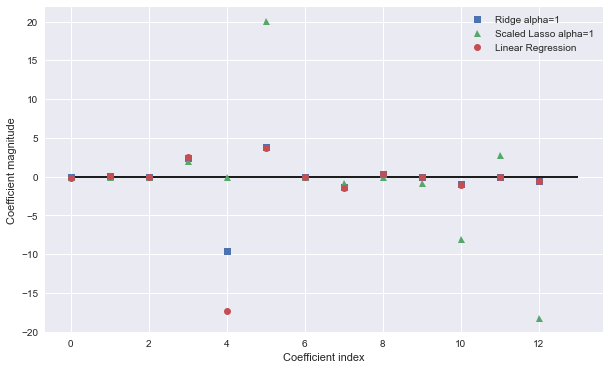

In [29]:
plt.figure(figsize=(10, 6))

plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
# plt.plot(ridge01.coef_, '^', label='Ridge alpha=0.1')
# plt.plot(ridge10.coef_, 'v', label='Ridge alpha=10')
plt.plot(lasso_scaled.coef_, '^', label='Scaled Lasso alpha=1')
plt.plot(LR.coef_, 'o', label='Linear Regression')

plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0, 0, len(LR.coef_))

plt.legend()

In [30]:
def scores_dataframe():
    """It returns a DataFrame with both test and train scores, sorted by 'test score'."""
    dic_scores = {
        'model': [
            'Linear Regression',
            'Ridge alpha=1',
            'Ridge alpha=0.1',
            'Ridge alpha=10',
            'Lasso alpha=1',
            'Lasso alpha=0.1',
            'Scaled Ridge alpha=1',
            'Scaled Lasso alpha=0.1'
        ],
        'test_scores': [
            LR.score(X_test, y_test),
            ridge.score(X_test, y_test),
            ridge01.score(X_test, y_test),
            ridge10.score(X_test, y_test),
            lasso.score(X_test, y_test),
            lasso01.score(X_test, y_test),
            ridge_scaled.score(X_test_scaled, y_test),
            lasso_scaled.score(X_test_scaled, y_test)
        ],
        'train_scores': [
            LR.score(X_train, y_train),
            ridge.score(X_train, y_train),
            ridge01.score(X_train, y_train),
            ridge10.score(X_train, y_train),
            lasso.score(X_train, y_train),
            lasso01.score(X_train, y_train),
            ridge_scaled.score(X_train_scaled, y_train),
            lasso_scaled.score(X_train_scaled, y_train)
        ]
    }
    
    return pd.DataFrame(dic_scores).sort_values(by='test_scores', ascending=False)

In [31]:
def linear_models_scores(dataframe):
    """It generates a bar plot with all linear scores in this notebook, sorted."""
    
    scores_df = dataframe
    
    # Plots everything out
    fig, (ax_test, ax_train) = plt.subplots(1, 2, figsize=(10, 4.5))
    
    ax_test.barh(scores_df['model'], scores_df['test_scores'])
    ax_test.set_title('Test Scores')

    ax_train.barh(scores_df['model'], scores_df['train_scores'])
    ax_train.set_title('Train Scores')

    fig.suptitle('Linear Models')

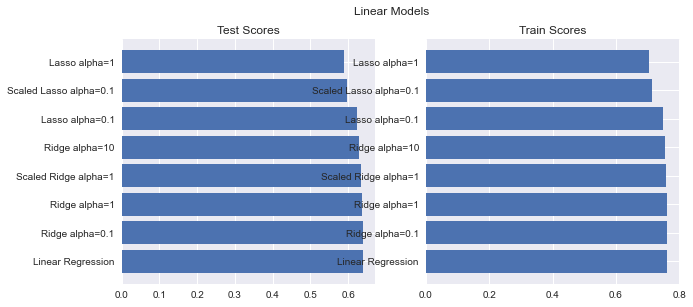

In [32]:
linear_models_scores(scores_dataframe())

___

# K nearest Neighbors

In [54]:
# We already split our train & test sets
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(5).fit(X_train, y_train)

In [55]:
knn.score(X_test, y_test), knn.score(X_train, y_train)

(0.4608706759090604, 0.7159673083467646)